### Tema do Projeto - ÁGUA POTÁVEL

O acesso à água potável é essencial para a saúde, um direito humano básico e um componente de uma política eficaz de proteção à saúde. 

Isso é importante como uma questão de saúde e desenvolvimento em nível nacional, regional e local. 

Em algumas regiões, foi demonstrado que os investimentos em abastecimento de água e saneamento podem gerar um benefício econômico líquido, uma vez que as reduções nos efeitos adversos à saúde e nos custos de saúde superam os custos de realizar as intervenções.



In [ ]:
# Sites das Bibliotecas para importação

# https://pandas.pydata.org/
# https://github.com/ResidentMario/missingno
# https://seaborn.pydata.org/
# https://matplotlib.org/stable/tutorials/index.html
# https://scikit-learn.org/stable/

In [1]:
# Bibliotecas

# Manipulação dos dados
import pandas as pd

# Visualização
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.head(n=5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
df.head

<bound method NDFrame.head of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

In [8]:
df.tail

<bound method NDFrame.tail of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=3276, step=1)

In [11]:
df.shape

(3276, 10)

In [15]:
linhas,colunas = df.shape
print(f"O numero de linhas = {linhas}; o numero de colunas = {colunas}")

O numero de linhas = 3276; o numero de colunas = 10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [19]:
df.rename(columns={"ph":"pH","Hardness":"Dureza","Solids":"Solidos","Chloramines":"Cloraminas","Sulfate":"Sulfato","Conductivity":"Condutividade","Organic_carbon":"Carbono_Organico","Trihalomethanes":"Trihalometanos","Turbidity":"Turbidez","Potability":"Potabilidade"}  ,inplace=True)

In [20]:
df.columns

Index(['pH', 'Dureza', 'Solidos', 'Cloraminas', 'Sulfato', 'Condutividade',
       'Carbono_Organico', 'Trihalometanos', 'Turbidez', 'Potabilidade'],
      dtype='object')

In [22]:
df.head(n=10)

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


## Informações Estatísticas dos Dados

In [23]:
df.describe()

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [24]:
df.describe(include="all")

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [25]:
# Dados Faltantes

df.isnull()

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [26]:
df.isnull().sum()

pH                  491
Dureza                0
Solidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono_Organico      0
Trihalometanos      162
Turbidez              0
Potabilidade          0
dtype: int64

In [29]:
abc = df["Sulfato"]
type(abc)

pandas.core.series.Series

### Informação dos Dados

1. valor de pH:
O pH é um parâmetro importante na avaliação do equilíbrio ácido-base da água. É também o indicador da condição ácida ou alcalina do estado da água. A OMS recomendou o limite máximo permitido de pH de 6,5 a 8,5. Os intervalos de investigação atuais foram de 6,52 a 6,83, que estão na faixa dos padrões da OMS.

2. Dureza:
A dureza é causada principalmente pelos sais de cálcio e magnésio. Esses sais são dissolvidos de depósitos geológicos pelos quais a água viaja. O tempo que a água está em contato com o material que produz dureza ajuda a determinar quanta dureza existe na água bruta. A dureza foi originalmente definida como a capacidade da água de precipitar o sabão causado pelo cálcio e magnésio.

3. Sólidos (total de sólidos dissolvidos - TDS):
A água tem a capacidade de dissolver uma ampla gama de minerais ou sais inorgânicos e alguns orgânicos, como potássio, cálcio, sódio, bicarbonatos, cloretos, magnésio, sulfatos, etc. Esses minerais produziram um sabor indesejável e uma cor diluída na aparência de água. Este é o parâmetro importante para o uso da água. A água com alto valor de TDS indica que a água é altamente mineralizada. O limite desejável para o TDS é 500 mg / le o limite máximo é 1000 mg / l, prescrito para beber.

4. Cloraminas:
O cloro e a cloramina são os principais desinfetantes usados ​​nos sistemas públicos de água. As cloraminas são mais comumente formadas quando a amônia é adicionada ao cloro para tratar a água potável. Os níveis de cloro de até 4 miligramas por litro (mg / L ou 4 partes por milhão (ppm)) são considerados seguros na água potável.

5. Sulfato:
Os sulfatos são substâncias que ocorrem naturalmente e são encontradas em minerais, solo e rochas. Eles estão presentes no ar ambiente, águas subterrâneas, plantas e alimentos. O principal uso comercial do sulfato é na indústria química. A concentração de sulfato na água do mar é de cerca de 2.700 miligramas por litro (mg / L). Varia de 3 a 30 mg / L na maioria dos suprimentos de água doce, embora concentrações muito mais altas (1000 mg / L) sejam encontradas em algumas localizações geográficas.

6. Condutividade:
Água pura não é um bom condutor de corrente elétrica, em vez disso, é um bom isolante. O aumento na concentração de íons aumenta a condutividade elétrica da água. Geralmente, a quantidade de sólidos dissolvidos na água determina a condutividade elétrica. A condutividade elétrica (EC) realmente mede o processo iônico de uma solução que permite a transmissão de corrente. De acordo com os padrões da OMS, o valor de CE não deve exceder 400 μS / cm.

7. Carbono Orgânico:
O Carbono Orgânico Total (TOC) nas águas de origem provém da matéria orgânica natural em decomposição (NOM), bem como de fontes sintéticas. TOC é uma medida da quantidade total de carbono em compostos orgânicos em água pura. De acordo com a US EPA, <2 mg / L como TOC em água tratada / potável e <4 mg / Lit em água de origem que é usada para tratamento.

8. Trihalometanos:
THMs são produtos químicos que podem ser encontrados na água tratada com cloro. A concentração de THMs na água potável varia de acordo com o nível de matéria orgânica na água, a quantidade de cloro necessária para tratar a água e a temperatura da água que está sendo tratada. Níveis de THM de até 80 ppm são considerados seguros na água potável.

9. Turbidez:
A turbidez da água depende da quantidade de matéria sólida presente no estado suspenso. É uma medida das propriedades de emissão de luz da água e o teste é usado para indicar a qualidade da descarga de resíduos em relação à matéria coloidal. O valor médio de turvação obtido para o Wondo Genet Campus (0,98 NTU) é inferior ao valor recomendado pela OMS de 5,00 NTU.

10. Potabilidade:
Indica se a água é segura para consumo humano, onde 1 significa potável e 0 significa não potável.

In [30]:
df.head(n=3)

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


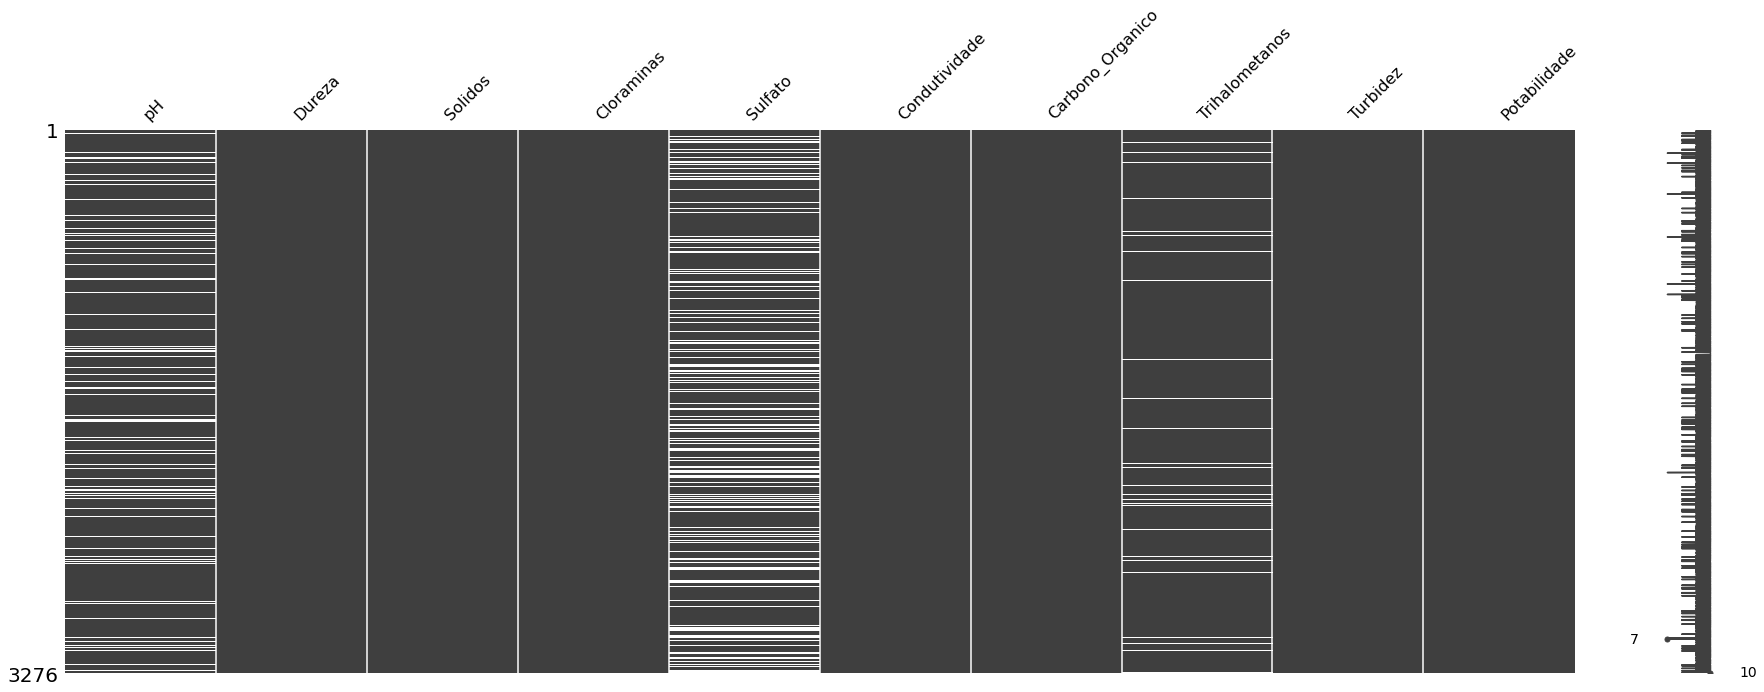

In [31]:
missingno.matrix(df, figsize=(30,10))

## OUTLIERS

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


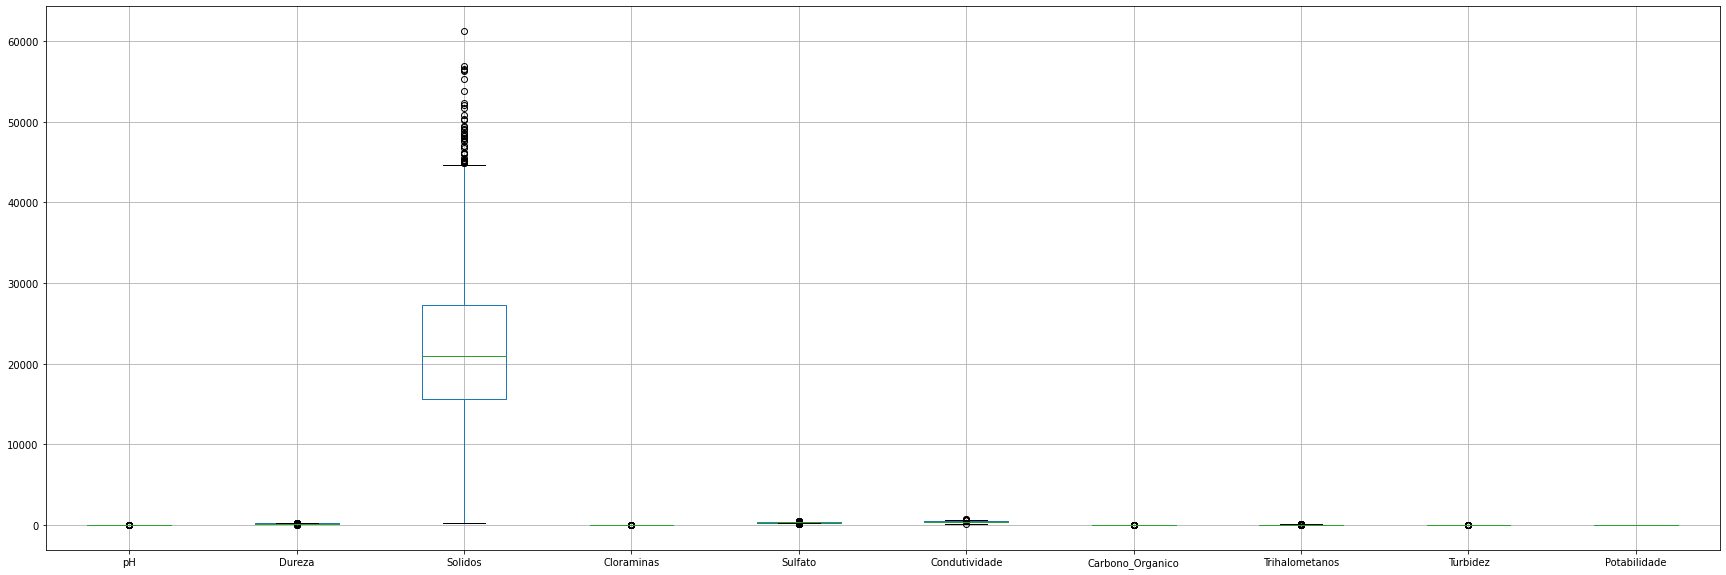

In [32]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

## Duplicatas

In [33]:
df[df.duplicated()]

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade


## Matriz de Correlação

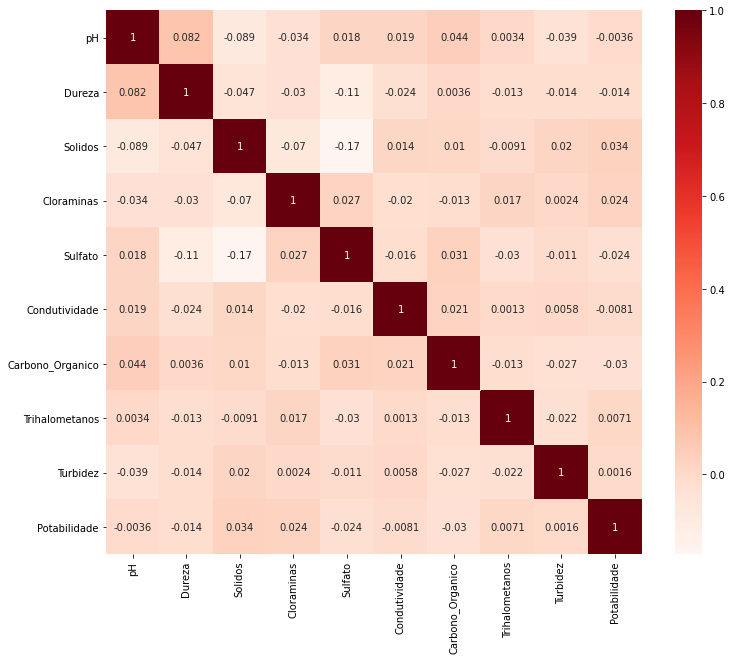

In [34]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [36]:
df["Dureza"].nunique()

3276

In [37]:
df["Dureza"].unique()

array([204.89045547, 129.42292051, 224.23625939, ..., 175.7626463 ,
       230.60375751, 195.10229859])

In [ ]:
# df["Dureza"].replace({0-100:"Dureza baixa", 101-300: "Dureza média", 301-500: "Dureza alta"}, inplace=True)
df.head()
# Em avaliação

Text(0, 0.5, 'Número de Resultados')

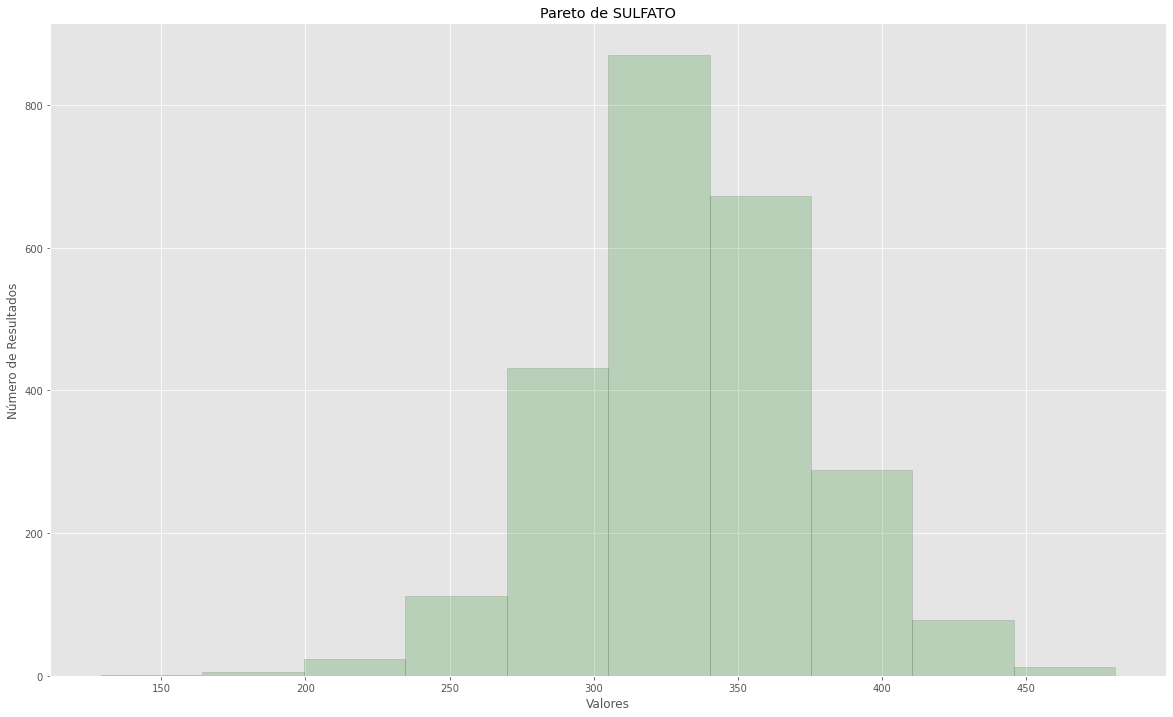

In [136]:
plt.figure(figsize = (20, 12))
df[df["Sulfato"] > 0]["Sulfato"].hist(bins = 10, ec = "k", alpha = .2, color = "green")
plt.title("Pareto de SULFATO")
plt.xlabel("Valores")
plt.ylabel("Número de Resultados")

### Modelagem/Machine Learning

In [130]:
df.shape

(3276, 10)

In [131]:
  amostra_df = df.sample(n=20)

In [132]:
amostra_df.shape

(20, 10)

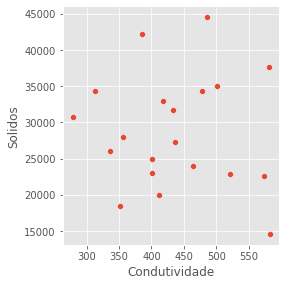

In [133]:
sns.pairplot(amostra_df, x_vars=["Condutividade"], y_vars=["Solidos"], height=4, kind="scatter")
plt.show()

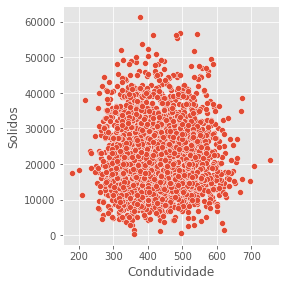

In [134]:
sns.pairplot(df, x_vars=["Condutividade"], y_vars=["Solidos"], height=4, kind="scatter")
plt.show()

In [137]:
df.head()

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [144]:
X = df[['Dureza', 'Solidos', 'Condutividade', 'Turbidez']]

In [149]:
y = df['Potabilidade']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [151]:
X_train.shape

(2293, 4)

In [152]:
X_test.shape

(983, 4)

In [153]:
X_train.head()

,Dureza,Solidos,Condutividade,Turbidez
2824,205.407825,13121.171943,399.283562,4.031496
673,203.419331,16925.012297,527.912544,3.920116
2377,182.999381,19259.193937,339.737304,6.226580
1721,201.596673,27682.507446,573.033779,5.241539
3040,191.813046,36435.793514,383.871055,3.844020


In [154]:
y_train.head()

2824    1
673     1
2377    1
1721    0
3040    0
Name: Potabilidade, dtype: int64

In [155]:
model = LinearRegression()

In [156]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
model.coef_

array([-1.05315336e-04,  2.27618612e-06,  7.87697659e-05, -1.20403896e-03])

In [159]:
model.intercept_

0.33215736991369627

In [160]:
# y = ax + b

In [161]:
model.score(X_test, y_test) * 100

-0.17544127259916387

In [162]:
df.head()

,pH,Dureza,Solidos,Cloraminas,Sulfato,Condutividade,Carbono_Organico,Trihalometanos,Turbidez,Potabilidade
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [164]:
df.describe

<bound method NDFrame.describe of             pH      Dureza  ...  Turbidez  Potabilidade
0          NaN  204.890455  ...  2.963135             0
1     3.716080  129.422921  ...  4.500656             0
2     8.099124  224.236259  ...  3.055934             0
3     8.316766  214.373394  ...  4.628771             0
4     9.092223  181.101509  ...  4.075075             0
...        ...         ...  ...       ...           ...
3271  4.668102  193.681735  ...  4.435821             1
3272  7.808856  193.553212  ...  2.798243             1
3273  9.419510  175.762646  ...  3.298875             1
3274  5.126763  230.603758  ...  4.708658             1
3275  7.874671  195.102299  ...  2.309149             1

[3276 rows x 10 columns]>

In [165]:
pH = float(input("pH: "))
Dureza = float(input("Dureza: "))
Solidos = float(input("Solidos: "))
Cloraminas = float(input("Cloraminas: "))
Sulfato = float(input("Sulfato: "))
Condutividade = float(input("Condutividade: "))
Carbono_Organico = float(input("Carbono_Organico: "))
Trihalometanos = float(input("Trihalometanos: "))
Turbidez = float(input("Turbidez: "))
Potabilidade = int(input("Potabilidade: "))

pH: 7
Dureza: 89
Solidos: 1150
Cloraminas: 7.9
Sulfato: 320
Condutividade: 550
Carbono_Organico: 12
Trihalometanos: 70
Turbidez: 3
Potabilidade: 1


In [166]:
df.describe

<bound method NDFrame.describe of             pH      Dureza  ...  Turbidez  Potabilidade
0          NaN  204.890455  ...  2.963135             0
1     3.716080  129.422921  ...  4.500656             0
2     8.099124  224.236259  ...  3.055934             0
3     8.316766  214.373394  ...  4.628771             0
4     9.092223  181.101509  ...  4.075075             0
...        ...         ...  ...       ...           ...
3271  4.668102  193.681735  ...  4.435821             1
3272  7.808856  193.553212  ...  2.798243             1
3273  9.419510  175.762646  ...  3.298875             1
3274  5.126763  230.603758  ...  4.708658             1
3275  7.874671  195.102299  ...  2.309149             1

[3276 rows x 10 columns]>

In [168]:
print(pH," - ",Dureza," - ",Solidos," - ",Cloraminas," - ",Sulfato," - ",Condutividade," - ",Carbono_Organico," - ",Trihalometanos," - ",Turbidez," - ",Potabilidade)

7.0  -  89.0  -  1150.0  -  7.9  -  320.0  -  550.0  -  12.0  -  70.0  -  3.0  -  1


In [170]:
pred = model.predict([[Dureza, Solidos, Condutividade, Turbidez]])
print(pred)

[0.36511317]


### Alteração do banco de dados para testar os comandos de agregação de valores nas colunas

In [46]:
dg = pd.read_csv("all_game_scores.csv")
dg.head()

,id,home_team_id,home_team_score,away_team_id,away_team_score,away_team_scores,home_team_scores,number_of_ots,date,attendance,playoff,season,notes
0,1,1,93,8,85,[],[],NaN,"Sat, Oct 29, 1949",NaN,False,1949-50,NaN
1,2,32,87,20,89,[],[],NaN,"Tue, Nov 1, 1949",NaN,False,1949-50,NaN
2,3,33,71,8,64,[],[],NaN,"Tue, Nov 1, 1949",NaN,False,1949-50,NaN
3,4,26,108,34,75,[],[],NaN,"Tue, Nov 1, 1949",NaN,False,1949-50,NaN
4,5,35,72,1,51,[],[],NaN,"Tue, Nov 1, 1949",NaN,False,1949-50,"at Chicago, IL"


In [105]:
dg.head

<bound method NDFrame.head of           id  home_team_id  home_team_score  ...  playoff   season           notes
0          1             1               93  ...    False  1949-50             NaN
1          2            32               87  ...    False  1949-50             NaN
2          3            33               71  ...    False  1949-50             NaN
3          4            26              108  ...    False  1949-50             NaN
4          5            35               72  ...    False  1949-50  at Chicago, IL
...      ...           ...              ...  ...      ...      ...             ...
42375  42376             2               90  ...    False  2002-03             NaN
42376  42377             6               82  ...    False  2002-03             NaN
42377  42378            23              108  ...    False  2002-03             NaN
42378  42379             9               78  ...    False  2002-03             NaN
42379  42380            15               87  ...     Fals

In [109]:
dg.columns

Index(['id', 'home_team_id', 'home_team_score', 'away_team_id',
       'away_team_score', 'away_team_scores', 'home_team_scores',
       'number_of_ots', 'date', 'attendance', 'playoff', 'season', 'notes'],
      dtype='object')

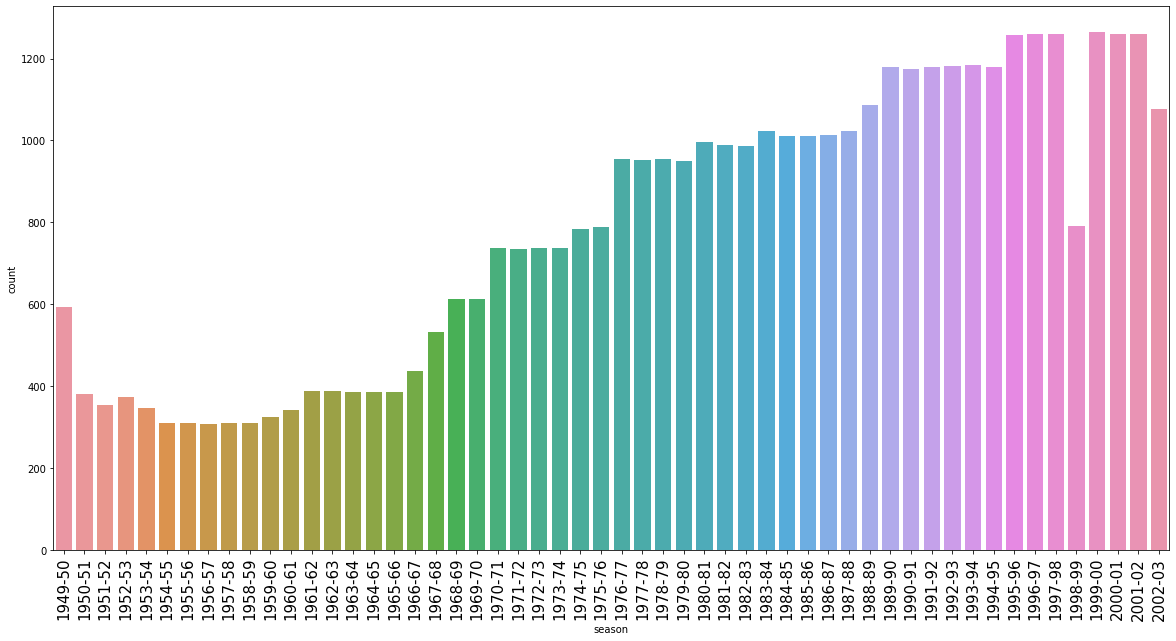

In [82]:
# https://www.delftstack.com/pt/howto/matplotlib/how-to-set-tick-labels-font-size-in-matplotlib/
# https://www.delftstack.com/pt/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

plt.figure(figsize=(20,10))
sns.countplot(x="season", data=dg)
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [89]:

dg["season"].unique()



array(['1949-50', '1950-51', '1951-52', '1952-53', '1953-54', '1954-55',
       '1955-56', '1956-57', '1957-58', '1958-59', '1959-60', '1960-61',
       '1961-62', '1962-63', '1963-64', '1964-65', '1965-66', '1966-67',
       '1967-68', '1968-69', '1969-70', '1970-71', '1971-72', '1972-73',
       '1973-74', '1974-75', '1975-76', '1976-77', '1977-78', '1978-79',
       '1979-80', '1980-81', '1981-82', '1982-83', '1983-84', '1984-85',
       '1985-86', '1986-87', '1987-88', '1988-89', '1989-90', '1990-91',
       '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97',
       '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03',
       nan], dtype=object)

Text(0, 0.5, 'Total de Placares')

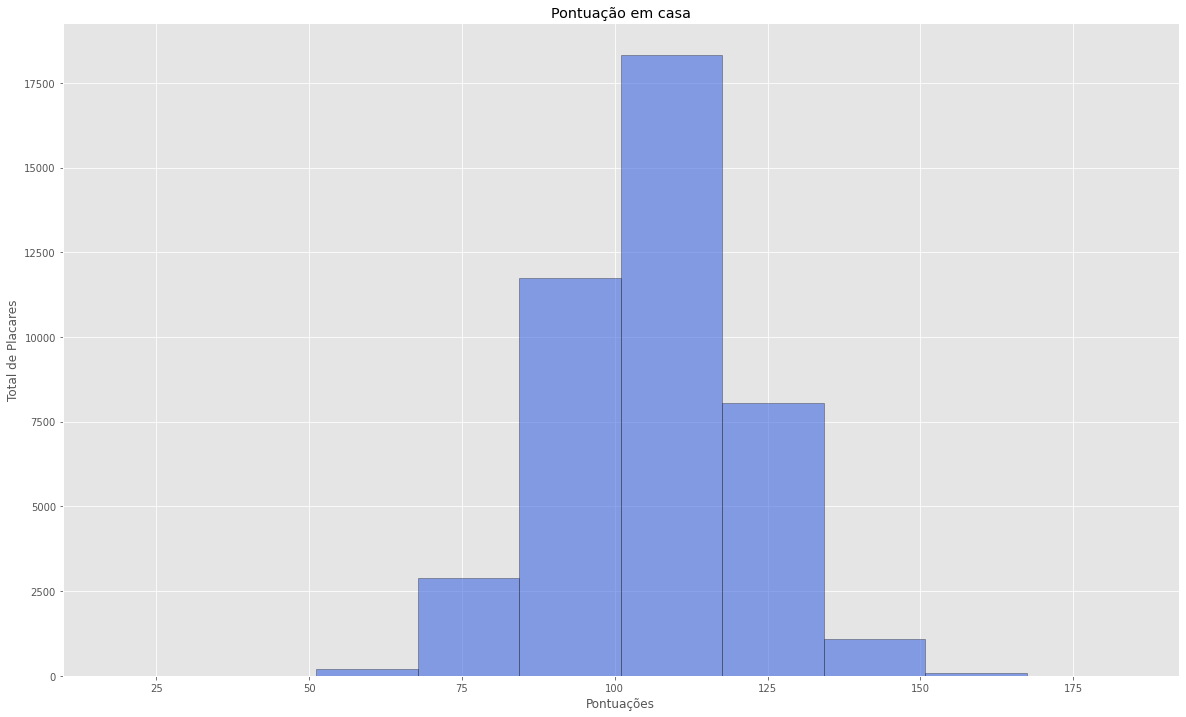

In [119]:
plt.figure(figsize = (20, 12))
dg[dg["home_team_score"] > 0]["home_team_score"].hist(bins = 10, ec = "k", alpha = .6, color = "royalblue")
plt.title("Pontuação em casa")
plt.xlabel("Pontuações")
plt.ylabel("Total de Placares")

Text(0, 0.5, 'Total de Placares')

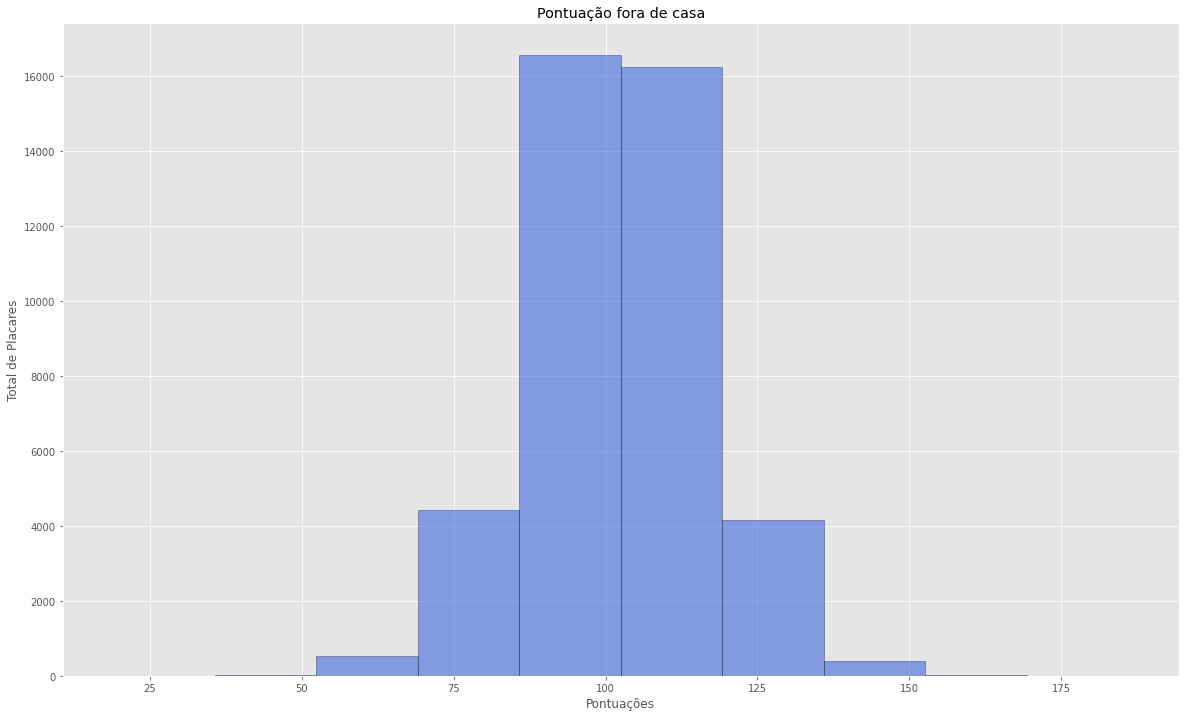

In [120]:
plt.figure(figsize = (20, 12))
dg[dg["away_team_score"] > 0]["away_team_score"].hist(bins = 10, ec = "k", alpha = .6, color = "royalblue")
plt.title("Pontuação fora de casa")
plt.xlabel("Pontuações")
plt.ylabel("Total de Placares")

In [121]:
dg.columns

Index(['id', 'home_team_id', 'home_team_score', 'away_team_id',
       'away_team_score', 'away_team_scores', 'home_team_scores',
       'number_of_ots', 'date', 'attendance', 'playoff', 'season', 'notes'],
      dtype='object')